In [6]:
import numpy as np
import	matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('train.csv')
train.set_index('ID',	inplace=True)

#Magnitudes, para armar colores
H = train.loc[:,'Hmag']
J	= train.loc[:,'Jmag']
U =	train.loc[:,'umag']
G =	train.loc[:,'gmag']
r = train.loc[:,'rmag']
i = train.loc[:,'imag']
z = train.loc[:,'zmag']
Y = train.loc[:,'Ymag']
K = train.loc[:,'Kmag']
W1 =	train.loc[:,'W1mag']
W2 =	train.loc[:,'W2mag']

#Radios donde se encierra la mitad de la luz

Y_r =	train.loc[:,'Yhlr']
J_r =	train.loc[:,'Jhlr']
H_r =	train.loc[:,'Hhlr']
K_r =	train.loc[:,'Khlr']

#Magnitud en apertura fija de 3''

U3 =	train.loc[:,'u3mag']
G3 =	train.loc[:,'g3mag']
r3 =	train.loc[:,'r3mag']
i3 =	train.loc[:,'i3mag']
Z3	=	train.loc[:,'Z3mag']
Y3	=	train.loc[:,'Y3mag']
J3	=	train.loc[:,'J3mag']
H3	=	train.loc[:,'H3mag']
K3	=	train.loc[:,'K3mag']

#Coordenadas

ra = train.loc[:,'RAdeg']
dec = train.loc[:,'DEdeg']

#Clases para entrenar

clase	= train.loc[:,'Hclass'] #0: Estrella, 1: Galaxia, 2: QSO

Preparemos los datos

In [7]:
#Tiro los Nans
mask_y	= Y_r > -98
mask_J = J_r > -98
mask_H	= H_r > -98
mask_K = K_r > -98
mask_total = mask_y & mask_J & mask_H & mask_K

train	= train[mask_total]


# Agregar columnas U-G, G-R, J3/J_r y Y3/Y_r
train['U-G'] = U - G
train['G-R'] = G - r
train['J3*J_r'] = J3 / J_r
train['Y3_Y_r'] = Y3 / Y_r

Importamos las librerias para seccionar los datos, los modelos a entrenar y las métricas

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.tree	import DecisionTreeClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

Preparo las variables

In [9]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)
X_train = df_train.drop('Hclass', axis=1)
Y_train	= df_train['Hclass']
X_test	= df_test.drop('Hclass', axis=1)
Y_test	= df_test['Hclass']

Primero, el árbol de decisiones para ver que hago las cosas bien

In [10]:
clf =	DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))
print(f1_score(Y_test, y_pred, average='weighted'))

[[1607   49   14]
 [  25 7107   92]
 [  13   79  781]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1670
           1       0.98      0.98      0.98      7224
           2       0.88      0.89      0.89       873

    accuracy                           0.97      9767
   macro avg       0.95      0.95      0.95      9767
weighted avg       0.97      0.97      0.97      9767

0.9722022985465913


Bien, no murió, probemos los demás modelos

SVC no debe dar bien para orden lineal, pero tal vez cúbico si

In [11]:
clf2 =	SVC(kernel='poly', degree=3, random_state=42)
clf2.fit(X_train, Y_train)
y_pred2 = clf2.predict(X_test)
print(confusion_matrix(Y_test, y_pred2))
print(classification_report(Y_test, y_pred2))
print(f1_score(Y_test, y_pred2, average='weighted'))

[[   0 1670    0]
 [   0 7224    0]
 [   0  873    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1670
           1       0.74      1.00      0.85      7224
           2       0.00      0.00      0.00       873

    accuracy                           0.74      9767
   macro avg       0.25      0.33      0.28      9767
weighted avg       0.55      0.74      0.63      9767

0.6289343902318404


/home/usuario/anaconda3/envs/astrometria/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usuario/anaconda3/envs/astrometria/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/usuario/anaconda3/envs/astrometria/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

Dio HORRIBLE pero era masomenos esperable, no hay fronteras claras entre los parámetros, lo vimos en la visualización

In [12]:
clf3 =	RandomForestClassifier(n_estimators=100, random_state=42)
clf3.fit(X_train, Y_train)
y_pred3 = clf3.predict(X_test)
print(confusion_matrix(Y_test, y_pred3))
print(classification_report(Y_test, y_pred3))
print(f1_score(Y_test, y_pred3, average='weighted'))

[[1621   41    8]
 [   7 7187   30]
 [   6   68  799]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1670
           1       0.99      0.99      0.99      7224
           2       0.95      0.92      0.93       873

    accuracy                           0.98      9767
   macro avg       0.98      0.96      0.97      9767
weighted avg       0.98      0.98      0.98      9767

0.9835000781924398


El mejor hasta el momento

Ahora, pruebo GNB por ser el mejor crossover que vi hasta el momento

In [13]:
clf4 =	GaussianNB()
clf4.fit(X_train, Y_train)
y_pred4 = clf4.predict(X_test)
print(confusion_matrix(Y_test, y_pred4))
print(classification_report(Y_test, y_pred4))
print(f1_score(Y_test, y_pred4, average='weighted'))

[[1507    4  159]
 [2088 1895 3241]
 [ 136    5  732]]
              precision    recall  f1-score   support

           0       0.40      0.90      0.56      1670
           1       1.00      0.26      0.42      7224
           2       0.18      0.84      0.29       873

    accuracy                           0.42      9767
   macro avg       0.53      0.67      0.42      9767
weighted avg       0.82      0.42      0.43      9767

0.428661996580699


Es literalmente horrible

Dado que random forest fue el mejor, vamos a jugar con los hiper parámetros y hacer el primer archivo para compartir

In [14]:
clf_bueno =	RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10, )
clf_bueno.fit(X_train, Y_train)
y_pred_bueno = clf_bueno.predict(X_test)
print(confusion_matrix(Y_test, y_pred_bueno))
print(classification_report(Y_test, y_pred_bueno))
print(f1_score(Y_test, y_pred_bueno, average='weighted'))

[[1615   46    9]
 [   6 7188   30]
 [   5   73  795]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1670
           1       0.98      1.00      0.99      7224
           2       0.95      0.91      0.93       873

    accuracy                           0.98      9767
   macro avg       0.98      0.96      0.97      9767
weighted avg       0.98      0.98      0.98      9767

0.9825602114202627


Tantos árboles empeoraron, mejor hago un plot

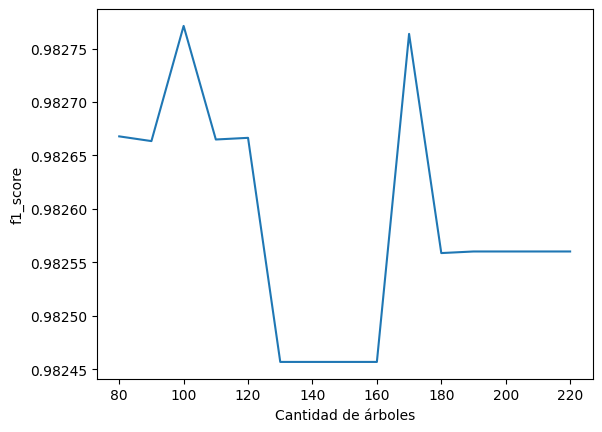

In [19]:
cantidad=15
f1 = np.zeros(cantidad)
for i in range (cantidad):
	clf = RandomForestClassifier(n_estimators=80+10*i, random_state=42, max_depth=10)
	clf.fit(X_train, Y_train)
	y_pred = clf.predict(X_test)
	f1[i]=f1_score(Y_test, y_pred, average='weighted')

plt.plot(range(80, 80+10*cantidad, 10), f1)
plt.xlabel('Cantidad de árboles')
plt.ylabel('f1_score')
plt.show()

El pico está en 170, probamos con eso y enviamos

In [20]:
clf_sumbit = RandomForestClassifier(n_estimators=170, random_state=42, max_depth=10)
clf_sumbit.fit(X_train, Y_train)
y_pred_sumbit = clf_sumbit.predict(X_test)
puntaje = f1_score(Y_test, y_pred_sumbit, average='weighted')
print(puntaje)

0.982763713111289


Efectivamente da bien, hagamos el test

In [21]:
test = pd.read_csv('test.csv')
test.set_index('ID', inplace=True)

# Magnitudes, para armar colores
H = test.loc[:, 'Hmag']
J = test.loc[:, 'Jmag']
U = test.loc[:, 'umag']
G = test.loc[:, 'gmag']
r = test.loc[:, 'rmag']
i = test.loc[:, 'imag']
z = test.loc[:, 'zmag']
Y = test.loc[:, 'Ymag']
K = test.loc[:, 'Kmag']
W1 = test.loc[:, 'W1mag']
W2 = test.loc[:, 'W2mag']

# Radios donde se encierra la mitad de la luz
Y_r = test.loc[:, 'Yhlr']
J_r = test.loc[:, 'Jhlr']
H_r = test.loc[:, 'Hhlr']
K_r = test.loc[:, 'Khlr']

# Magnitud en apertura fija de 3''
U3 = test.loc[:, 'u3mag']
G3 = test.loc[:, 'g3mag']
r3 = test.loc[:, 'r3mag']
i3 = test.loc[:, 'i3mag']
Z3 = test.loc[:, 'Z3mag']
Y3 = test.loc[:, 'Y3mag']
J3 = test.loc[:, 'J3mag']
H3 = test.loc[:, 'H3mag']
K3 = test.loc[:, 'K3mag']

# Coordenadas
ra = test.loc[:, 'RAdeg']
dec = test.loc[:, 'DEdeg']

#NO TIRO LOS NANS PORQUE SINO NO ES VÁLIDO EN KAGGLE
#Tiro los Nans
#mask_y	= Y_r > -98
#mask_J = J_r > -98
#mask_H	= H_r > -98
#mask_K = K_r > -98
#mask_total = mask_y & mask_J & mask_H & mask_K
#
#test	= test[mask_total]


# Agregar columnas U-G, G-R, J3/J_r y Y3/Y_r
test['U-G'] = U - G
test['G-R'] = G - r
test['J3*J_r'] = J3 / J_r
test['Y3_Y_r'] = Y3 / Y_r

In [22]:
#Elegir sólo las columnas que se usaron para entrenar
X_test_final = test[X_train.columns]

predictions = clf_sumbit.predict(X_test_final)

test['Hclass'] = predictions

test.loc[:, ['Hclass']].to_csv('submit.csv', index=True)